# FIND THE BEST FEATURES USING FORWARD BACKWARD AND BIDIRECTIONAL METHODS

In [1]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [111]:
# Split the Data

In [2]:
all_features = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'symmetry_worst',
       'fractal_dimension_worst']

In [3]:
len(all_features)

14

In [4]:
df = pd.read_csv('wdbc_preped_scaled.csv',index_col = False)
X = df[all_features]
y = df['Diagnosis']
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=1)

# Select Best features set

In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load your dataset (replace this with your data)
df = pd.read_csv('wdbc_preped_scaled.csv',index_col = False)
df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})
X = df[all_features]
y = df['Diagnosis']

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=1)

In [6]:
model = LogisticRegression(max_iter = 10000)

# Initialize the forward feature selector
sfs_fw = SequentialFeatureSelector(model, forward=True, k_features='best', scoring='accuracy', cv=5, verbose = 0)
sfs_bk = SequentialFeatureSelector(model, forward=False, k_features='best', scoring='accuracy', cv=5, verbose = 0)
ffs = SequentialFeatureSelector(model, k_features='best', scoring='accuracy', cv=5)
# efs = ExhaustiveFeatureSelector(model, min_features=1, max_features=(len(df.columns) - 3),scoring='accuracy', cv=5)

# Fit the feature selector to your data
sfs_fw.fit(xtrain, ytrain)
sfs_bk.fit(xtrain, ytrain)
ffs.fit(xtrain, ytrain)
# efs.fit(xtrain, ytrain)

# Get the selected feature indices
selected_features_indices_sfs_fw = sfs_fw.k_feature_idx_
selected_features_indices_sfs_bk = sfs_bk.k_feature_idx_
selected_features_indices_ffs = ffs.k_feature_idx_
# selected_features_indices_efs = efs.k_feature_idx_

selected_features_indices = {'selected_features_indices_sfs_fw': sfs_fw.k_feature_idx_,
                                'selected_features_indices_sfs_bk' : sfs_bk.k_feature_idx_,
                                'selected_features_indices_ffs' : ffs.k_feature_idx_
                            }

print("Selected feature indices (Forward Selection):", selected_features_indices['selected_features_indices_sfs_fw'])
print("Selected feature indices (Backward Selection):", selected_features_indices['selected_features_indices_sfs_bk'])
print("Selected feature indices (Bidirectional Selection):", selected_features_indices['selected_features_indices_ffs'])

Selected feature indices (Forward Selection): (0, 1, 2, 5, 9, 10, 11, 12, 13)
Selected feature indices (Backward Selection): (0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)
Selected feature indices (Bidirectional Selection): (0, 1, 2, 5, 9, 10, 11, 12, 13)


In [210]:
# Adding all the selected features to a list

In [22]:
# Adding all the selected features to a list

list_sfs_fw = list(sfs_fw.k_feature_idx_)
list_sfs_bk = list(sfs_bk.k_feature_idx_)
list_sfs_bi = list(ffs.k_feature_idx_)
selected_features = [list_sfs_fw,list_sfs_bk,list_sfs_bi,list_altered]
Selected_features_names = ['fw','bw','st','list_altered']

# Print out the features that are selected 
##---------------------------------------------Run when you want to print the names
# print('features selected are as follows...')
# df_all_features = pd.DataFrame(all_features)
# for features in selected_features:
#     print(df_all_features.iloc[features,:])

In [15]:
X.columns[[list_sfs_fw]]

C:\Users\craig1993\AppData\Local\Temp\ipykernel_12448\3932455980.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X.columns[[list_sfs_fw]]


array([['radius_mean', 'texture_mean', 'smoothness_mean',
        'fractal_dimension_mean', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'symmetry_worst',
        'fractal_dimension_worst']], dtype=object)

In [20]:
list_sfs_fw

[0, 1, 2, 5, 9, 10, 11, 12, 13]

In [21]:
list_altered = [0, 1, 2, 9, 10, 11, 12, 13]

In [23]:
# Load your dataset (replace this with your data)
df = pd.read_csv('wdbc_preped_scaled.csv',index_col = False)
df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})

result_df = pd.DataFrame()

# Results DF
result_df = pd.DataFrame(columns=['Best_cutoff','least_error','Best_Sensitivity', 'Best_Specificity','Best_Accuracy'])

# RUNINING FOR MULTIPLE CUTOFF VALUES
cts = [0.1,0.2,0.3,0.4,0.5,0.6, 0.7,0.8,0.9]
ypred = []

ct_list = []
error_list = []
sensitivity_list = []
specificity_list = []
accuracy_list = []
feature_selection_list = []

for features,feature_name in zip(selected_features,Selected_features_names):
    
    best_ct = 0
    best_accuracy = 0
    best_spec = 0
    best_sen = 0
    error_min = 1000
    
    df1 = df[all_features]
    X = df1.iloc[:,features]
    y = df['Diagnosis']
    xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=1)
    model = LogisticRegression( penalty= 'l2', max_iter = 10000,  verbose=0)
    model.fit(xtrain, ytrain)
    
    print(f'##########{features}#############')
    for ct in cts:
        print(f'----------------{ct}----------------')
        #predict proba of model
        y_pred_prob = model.predict_proba(xtest)
        
        ypred = []
        
        #evaluvate the proba
        for i in range(0, (len( y_pred_prob))):
            # print(y_pred_prob[i][1])
            if y_pred_prob[i][1] > ct:
                result = 1
            else:
                result = 0
            ypred.append(result)
            # print(result)
        
        accuracy = accuracy_score(ytest, ypred)
        conf_matrix = confusion_matrix(ytest, ypred)
        # Extract TP, TN, FP, FN
        TN = conf_matrix[0, 0]
        FP = conf_matrix[0, 1]
        FN = conf_matrix[1, 0]
        TP = conf_matrix[1, 1]
        
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        error = (FP + FN) / (TP + TN + FP + FN)
        
        #----In the confusion matrix obtained using confusion_matrix(ytest, ypred),
        #      the rows represent the actual classes, and the columns represent the 
        #      predicted classes. The confusion matrix is a 2x2 matrix for binary 
        #      classification problems. Let's break down the elements:
        
        # Extract coefficients
        coefficients = model.coef_[0]
        
        # Calculate odds ratio
        odds_ratio = np.exp(coefficients)
        odds_ratio = [round(num, 2) for num in odds_ratio]
        
        for i in range(0,len(features)):
            print(f'{i+1}  {all_features[i]} has a odds ratio of {odds_ratio[i]}')
        
        if error < error_min:
            error_min = error
            best_accuracy = accuracy
            best_ct= ct
            best_spec = specificity
            best_sen = sensitivity
            
        feature_selection_list.append(feature_name)
        ct_list.append(ct)
        error_list.append(error)
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        accuracy_list.append(accuracy)

    result_df.loc[feature_name, 'Best_cutoff'] = best_ct
    result_df.loc[feature_name, 'least_error'] = error_min
    result_df.loc[feature_name, 'Best_Sensitivity'] = best_sen
    result_df.loc[feature_name, 'Best_Specificity'] = best_spec
    result_df.loc[feature_name, 'Best_Accuracy'] = best_accuracy
    
result_df
ind_results_df = pd.DataFrame({'Selection Mtd':feature_selection_list,'cutoff':ct_list,'error':error_list,
                              'Sensitivity':sensitivity_list,'Specificity':specificity_list, 'Accuracy':accuracy_list})

##########[0, 1, 2, 5, 9, 10, 11, 12, 13]#############
----------------0.1----------------
1  radius_mean has a odds ratio of 1004.2
2  texture_mean has a odds ratio of 21.16
3  smoothness_mean has a odds ratio of 10.68
4  compactness_mean has a odds ratio of 0.41
5  symmetry_mean has a odds ratio of 10.3
6  fractal_dimension_mean has a odds ratio of 0.45
7  radius_se has a odds ratio of 0.69
8  texture_se has a odds ratio of 21.02
9  smoothness_se has a odds ratio of 10.02
----------------0.2----------------
1  radius_mean has a odds ratio of 1004.2
2  texture_mean has a odds ratio of 21.16
3  smoothness_mean has a odds ratio of 10.68
4  compactness_mean has a odds ratio of 0.41
5  symmetry_mean has a odds ratio of 10.3
6  fractal_dimension_mean has a odds ratio of 0.45
7  radius_se has a odds ratio of 0.69
8  texture_se has a odds ratio of 21.02
9  smoothness_se has a odds ratio of 10.02
----------------0.3----------------
1  radius_mean has a odds ratio of 1004.2
2  texture_mean has

In [24]:
#Results for the all cutoffs
ind_results_df

,Selection Mtd,cutoff,error,Sensitivity,Specificity,Accuracy
0,fw,0.1,0.447368,1.000000,0.291667,0.552632
1,fw,0.2,0.236842,1.000000,0.625000,0.763158
2,fw,0.3,0.070175,0.952381,0.916667,0.929825
3,fw,0.4,0.043860,0.904762,0.986111,0.956140
4,fw,0.5,0.061404,0.833333,1.000000,0.938596
5,fw,0.6,0.131579,0.642857,1.000000,0.868421
6,fw,0.7,0.192982,0.476190,1.000000,0.807018
7,fw,0.8,0.271930,0.261905,1.000000,0.728070
8,fw,0.9,0.342105,0.071429,1.000000,0.657895
9,bw,0.1,0.421053,1.000000,0.333333,0.578947


In [217]:
# Results for the best 
df_temp = ind_results_df[((ind_results_df['cutoff'] == 0.3) | (ind_results_df['cutoff'] == 0.4)) & (ind_results_df['Selection Mtd'] != 'fw')]


In [213]:
# Results for the best cutoff
result_df

,Best_cutoff,least_error,Best_Sensitivity,Best_Specificity,Best_Accuracy
fw,0.4,0.04386,0.904762,0.986111,0.95614
bw,0.4,0.035088,0.928571,0.986111,0.964912
st,0.4,0.04386,0.904762,0.986111,0.95614


In [ ]:
# Visuals for the Error

<Axes: xlabel='cutoff', ylabel='error'>

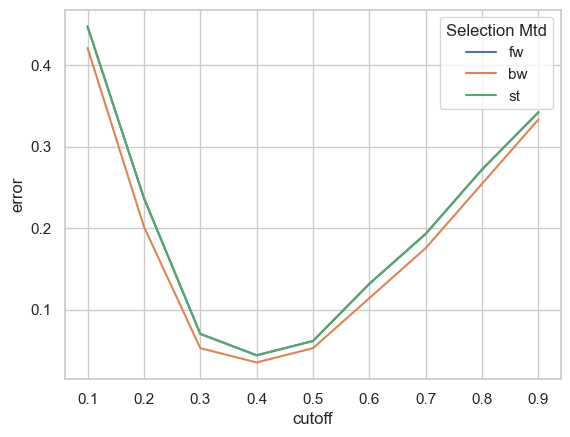

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='cutoff', y='error', hue='Selection Mtd', data=ind_results_df)

Text(0.5, 1.0, 'Bar Chart: Error vs cutoff for diff selection mtds')

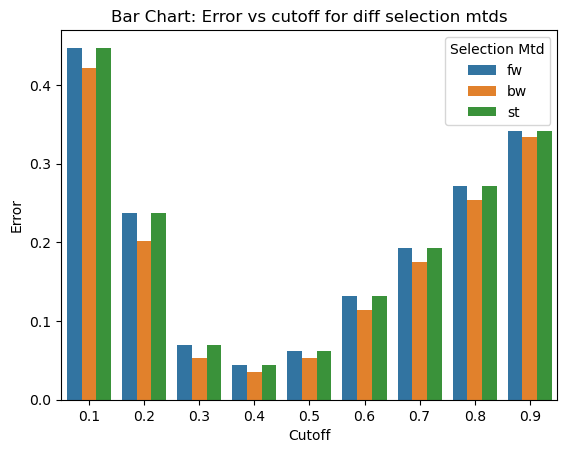

In [151]:
sns.barplot(x='cutoff', y='error', hue='Selection Mtd', data=ind_results_df)

# Add labels and title
plt.xlabel('Cutoff')
plt.ylabel('Error')
plt.title('Bar Chart: Error vs cutoff for diff selection mtds')

In [ ]:
# Bar Chart: Sensitivity vs cutoff for diff selection mtds

Text(0.5, 1.0, 'Bar Chart: Sensitivity vs cutoff for diff selection mtds')

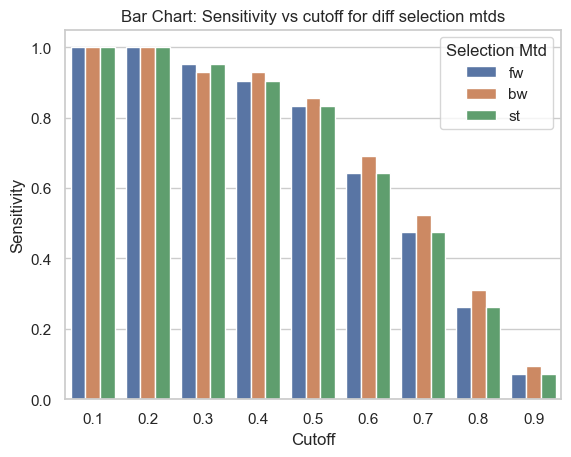

In [219]:
sns.barplot(x='cutoff', y='Sensitivity', hue='Selection Mtd', data=ind_results_df)

# Add labels and title
plt.xlabel('Cutoff')
plt.ylabel('Sensitivity')
plt.title('Bar Chart: Sensitivity vs cutoff for diff selection mtds')

In [ ]:
# Bar Chart: Sensitivity vs cutoff for diff selection mtds

Text(0.5, 1.0, 'Bar Chart: Specificity vs cutoff for diff selection mtds')

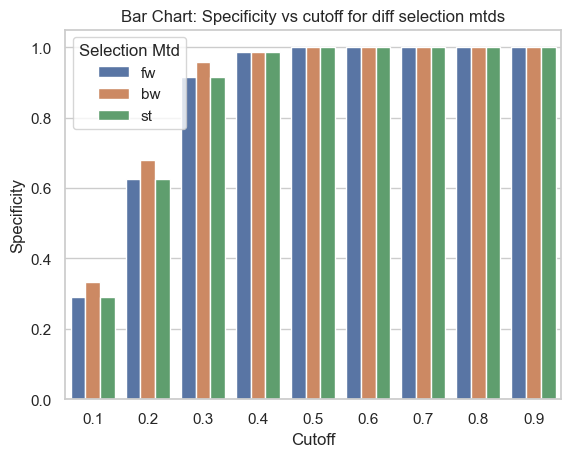

In [220]:
sns.barplot(x='cutoff', y='Specificity', hue='Selection Mtd', data=ind_results_df)

# Add labels and title
plt.xlabel('Cutoff')
plt.ylabel('Specificity')
plt.title('Bar Chart: Specificity vs cutoff for diff selection mtds')